In [1]:
import pandas as p
import seaborn as sb

In [2]:
df=p.read_csv('metadata.csv')
print(df.head(2))

   cord_uid  sha  source_x                                              title  \
0  8q5ondtn  NaN  Elsevier  Intrauterine virus infections and congenital h...   
1  pzfd0e50  NaN  Elsevier                  Coronaviruses in Balkan nephritis   

                            doi pmcid  pubmed_id    license  \
0  10.1016/0002-8703(72)90077-4   NaN  4361535.0  els-covid   
1  10.1016/0002-8703(80)90355-5   NaN  6243850.0  els-covid   

                                            abstract publish_time  \
0  Abstract The etiologic basis for the vast majo...   1972-12-31   
1                                                NaN   1980-03-31   

                                             authors                 journal  \
0                                  Overall, James C.  American Heart Journal   
1  Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan;...  American Heart Journal   

   Microsoft Academic Paper ID WHO #Covidence  has_pdf_parse  \
0                          NaN            NaN        

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df=df.drop(['sha'],axis=1)
df=df.drop(['pmcid'],axis=1)
df=df.drop(['pubmed_id'],axis=1)
df=df.drop(['Microsoft Academic Paper ID'],axis=1)
df=df.drop(['WHO #Covidence'],axis=1)
df=df.drop(['has_pdf_parse'],axis=1)
df=df.drop(['full_text_file'],axis=1)
df=df.drop(['cord_uid'],axis=1)
df=df.drop(['has_pmc_xml_parse'],axis=1)
df=df.drop(['url'],axis=1)
df=df.drop(['doi'],axis=1)

# Upto This only some the irrelevent attributes of the raw data is removed

In [4]:
df.head(10)

,source_x,title,license,abstract,publish_time,authors,journal
0,Elsevier,Intrauterine virus infections and congenital h...,els-covid,Abstract The etiologic basis for the vast majo...,1972-12-31,"Overall, James C.",American Heart Journal
1,Elsevier,Coronaviruses in Balkan nephritis,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan;...",American Heart Journal
2,Elsevier,Cigarette smoking and coronary heart disease: ...,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal
3,Elsevier,Clinical and immunologic studies in identical ...,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine
4,Elsevier,Epidemiology of community-acquired respiratory...,els-covid,Abstract Upper respiratory tract infections ar...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine
5,Elsevier,Infectious diarrhea: Pathogenesis and risk fac...,els-covid,Abstract Our understanding of the pathogenesis...,1985-06-28,"Cantey, J.Robert",The American Journal of Medicine
6,Elsevier,New perspectives on the pathogenesis of rheuma...,els-covid,Abstract In the pathogenesis of rheumatoid art...,1988-10-14,"Zvaifler, Nathan J.",The American Journal of Medicine
7,Elsevier,Management of acute and chronic respiratory tr...,els-covid,"Abstract Pharyngitis, bronchitis, and pneumoni...",1988-09-16,"Ellner, Jerrold J.",The American Journal of Medicine
8,Elsevier,Acute bronchitis: Results of U.S. and European...,els-covid,"Abstract Acute bronchitis, an illness frequent...",1992-06-22,"Dere, Willard H.",The American Journal of Medicine
9,Elsevier,Clinical and Immunologic Responses in Patients...,els-covid,NaN,1975-10-31,"Knopf, Harry L.S.; Hierholzer, John C.",American Journal of Ophthalmology


In [5]:
df['publish_time'].value_counts()

2020          585
2006-12-31    358
2016-12-31    295
2008-12-31    279
2012-12-31    260
2017-12-31    244
2020-03-31    229
2014-12-31    228
2019-12-31    227
2015-12-31    217
2018-12-31    211
2011-12-31    205
2009-12-31    205
2007-12-31    204
2005-12-31    179
2010-12-31    174
2013-12-31    166
2004-12-31    164
2020-03-30    161
2020-03-27    136
2020-03-20    133
2003          121
2020-12-31    109
2004          105
2003-12-31     96
2020-03-12     90
2020-04-30     89
2020-03-06     88
2020-02-29     87
2020-03-13     87
             ... 
2006-10-09      1
2009-03-23      1
2007-06-28      1
2014-09-07      1
2003-04-03      1
2004-03-21      1
2004-06-10      1
2013-04-07      1
1970-09-26      1
1991-02-01      1
2012-05-10      1
1978-07-15      1
2011-04-12      1
1992-09-18      1
2009-02-21      1
2008-09-21      1
2001-06-03      1
1988-02-03      1
2004-07-30      1
2010-12-11      1
2004-05-20      1
2008-05-09      1
2005-11-16      1
2016-12-17      1
1990-04-10

In [6]:
df=df[df['title'].notna()]
train_data=""
df=df[df['publish_time'].notna()]
for i, row in df.iterrows():
    if (int(df.loc[i,'publish_time'][:4])<2020):
        train_data+=df.loc[i,'title']
        df.drop([i], axis = 0, inplace = True)
    #else:
        #train_data+=" "
        #train_data+=df.loc[i,'title']
print(df.shape)

(4324, 7)


In [7]:
df.head(10)

,source_x,title,license,abstract,publish_time,authors,journal
1784,Elsevier,Modifiable Areal Unit Problem,els-covid,"Abstract The modifiable areal unit problem, MA...",2020-12-31,"Buzzelli, Michael",International Encyclopedia of Human Geography
1785,Elsevier,Globalization of Communicable Diseases,els-covid,Abstract Fueled by globalization and human beh...,2020-12-31,"Oppong, Joseph R.",International Encyclopedia of Human Geography
1786,Elsevier,"Diseases, Emerging and Infectious",els-covid,Abstract Emerging and infectious diseases have...,2020-12-31,"Antabe, Roger; Ziegler, Bianca Rosa",International Encyclopedia of Human Geography
1787,Elsevier,Interdisciplinarity,els-covid,Abstract Interdisciplinarity employs multiple ...,2020-12-31,"Raento, Pauliina",International Encyclopedia of Human Geography
1792,Elsevier,15 An overview of automated room disinfection ...,els-covid,Abstract Conventional disinfection methods are...,2020-12-31,"Otter, J.A.; Yezli, S.; Barbut, F.; Perl, T.M.",Decontamination in Hospitals and Healthcare
1793,Elsevier,Chapter 5 Bay Leaf,els-covid,Abstract Bay leaf (Laurus nobilis) is a perenn...,2020-12-31,"Batool, Saima; Khera, Rasheed Ahmad; Hanif, Mu...",Medicinal Plants of South Asia
2557,Elsevier,Pneumonia,els-covid,Abstract Pneumonia remains the main cause of m...,2020-12-31,"Banu, Buyukaydin",Encyclopedia of Biomedical Gerontology
2560,Elsevier,Liver Disease Associated with Non-Hepatitis Vi...,els-covid,Abstract Hepatitis is commonly associated with...,2020-12-31,"Spengler, Ulrich",Encyclopedia of Gastroenterology
2729,Elsevier,Virus Taxonomy,els-covid,Abstract Virus taxonomy is the classification ...,2020-12-31,"Kuhn, Jens H.",Reference Module in Life Sciences
2730,Elsevier,Antiviral Innate Immunity: Introduction ☆,els-covid,Abstract The concept of “innate immunity” incl...,2020-12-31,"Weber, Friedemann",Reference Module in Life Sciences


In [8]:
df['title'].value_counts()

Department of Error                                                                                                                                                                        7
Feedback                                                                                                                                                                                   4
Estimating case fatality rates of COVID-19                                                                                                                                                 3
Working hypothesis                                                                                                                                                                         3
Evidence for gastrointestinal infection of SARS-CoV-2                                                                                                                                      2
Characteristics of peripheral blood leukocyte different

In [9]:
df['license'].value_counts()

els-covid      1419
unk            1069
medrvix         839
cc-by           445
biorxiv         301
no-cc            96
cc-by-nc-nd      74
cc-by-nc         65
cc-by-nc-sa       9
pd                3
cc0               3
cc-by-nd          1
Name: license, dtype: int64

In [10]:
df['authors'].value_counts()

MacKenzie, Debora                                                                                                                                                                                                                                                                                                                                                                 10
Nature                                                                                                                                                                                                                                                                                                                                                                             9
Hamzelou, Jessica                                                                                                                                                                                                                                             

In [11]:
df['journal'].value_counts()

The Lancet                                                    106
The Lancet Infectious Diseases                                 76
New Scientist                                                  68
Journal of Medical Virology                                    52
Travel Medicine and Infectious Disease                         46
Journal of Infection                                           46
Nature                                                         42
Euro Surveill                                                  36
Viruses                                                        33
International Journal of Infectious Diseases                   32
Journal of Hospital Infection                                  30
The Lancet Respiratory Medicine                                29
JAMA                                                           28
BMJ                                                            28
Zhonghua Jie He He Hu Xi Za Zhi                                25
Science   

# Remaining attributes are roughly analysed for furthur process

In [12]:
df.head(20)

,source_x,title,license,abstract,publish_time,authors,journal
1784,Elsevier,Modifiable Areal Unit Problem,els-covid,"Abstract The modifiable areal unit problem, MA...",2020-12-31,"Buzzelli, Michael",International Encyclopedia of Human Geography
1785,Elsevier,Globalization of Communicable Diseases,els-covid,Abstract Fueled by globalization and human beh...,2020-12-31,"Oppong, Joseph R.",International Encyclopedia of Human Geography
1786,Elsevier,"Diseases, Emerging and Infectious",els-covid,Abstract Emerging and infectious diseases have...,2020-12-31,"Antabe, Roger; Ziegler, Bianca Rosa",International Encyclopedia of Human Geography
1787,Elsevier,Interdisciplinarity,els-covid,Abstract Interdisciplinarity employs multiple ...,2020-12-31,"Raento, Pauliina",International Encyclopedia of Human Geography
1792,Elsevier,15 An overview of automated room disinfection ...,els-covid,Abstract Conventional disinfection methods are...,2020-12-31,"Otter, J.A.; Yezli, S.; Barbut, F.; Perl, T.M.",Decontamination in Hospitals and Healthcare
1793,Elsevier,Chapter 5 Bay Leaf,els-covid,Abstract Bay leaf (Laurus nobilis) is a perenn...,2020-12-31,"Batool, Saima; Khera, Rasheed Ahmad; Hanif, Mu...",Medicinal Plants of South Asia
2557,Elsevier,Pneumonia,els-covid,Abstract Pneumonia remains the main cause of m...,2020-12-31,"Banu, Buyukaydin",Encyclopedia of Biomedical Gerontology
2560,Elsevier,Liver Disease Associated with Non-Hepatitis Vi...,els-covid,Abstract Hepatitis is commonly associated with...,2020-12-31,"Spengler, Ulrich",Encyclopedia of Gastroenterology
2729,Elsevier,Virus Taxonomy,els-covid,Abstract Virus taxonomy is the classification ...,2020-12-31,"Kuhn, Jens H.",Reference Module in Life Sciences
2730,Elsevier,Antiviral Innate Immunity: Introduction ☆,els-covid,Abstract The concept of “innate immunity” incl...,2020-12-31,"Weber, Friedemann",Reference Module in Life Sciences


In [13]:
df.shape

(4324, 7)

# Natural Language Processing

In [14]:
import nltk

In [15]:
#nltk.download()

In [16]:
pr_nouns=()
for i, row in df.iterrows():
    #print(df.loc[i,'abstract'])
    sentences=(nltk.tokenize.sent_tokenize(df.loc[i,'title']))
    for sent in sentences:
        words=nltk.word_tokenize(sent)
        pOfS=nltk.pos_tag(words)
        for p in pOfS:
            if (p[1]=="NN" or p[1]=="NNP" or p[1]=="NNS" or p[1]=="NNPS"): pr_nouns+=(p[0],)
print(len(pr_nouns))

28182


In [17]:
w_freq = nltk.FreqDist(w.lower() for w in pr_nouns)
most_occur=(w_freq.most_common(50))
for i in most_occur: print(i)

('covid-19', 1375)
('coronavirus', 1313)
('china', 468)
('disease', 465)
('patients', 374)
('sars-cov-2', 360)
('outbreak', 360)
('novel', 351)
('infection', 347)
('pneumonia', 325)
('virus', 246)
('health', 214)
('analysis', 208)
('wuhan', 199)
('respiratory', 173)
('transmission', 170)
('cases', 167)
('study', 166)
('epidemic', 150)
('control', 136)
('characteristics', 133)
('treatment', 130)
('case', 116)
('pandemic', 115)
('infections', 107)
('prevention', 104)
('detection', 102)
('management', 101)
('risk', 95)
('response', 94)
('diagnosis', 91)
('model', 89)
('review', 88)
('syndrome', 88)
('care', 87)
('features', 83)
('ct', 78)
('impact', 77)
('chapter', 76)
('emergency', 74)
('protein', 72)
('diseases', 71)
('data', 71)
('strategies', 68)
('children', 67)
('spread', 65)
('rna', 62)
('system', 61)
('’', 60)
('hospital', 59)


In [31]:
import nltk
from nltk.tokenize import PunktSentenceTokenizer

custom_sent_tokenizer = PunktSentenceTokenizer(train_data)

pr_nouns2=()
for i, row in df.iterrows():
    tokenized = custom_sent_tokenizer.tokenize(df.loc[i,'title'])
    try:
        for i in tokenized[:5]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            for p in tagged:
                if (p[1]=="NN" or p[1]=="NNP" or p[1]=="NNS" or p[1]=="NNPS"): pr_nouns2+=(p[0],)
            #print(tagged)
    except Exception as e:
        print(str(e))
    #process_content()
print(len(pr_nouns2))


28185


In [19]:
print(type(train_text))

<class 'str'>


In [20]:
w_freq = nltk.FreqDist(w.lower() for w in pr_nouns2)
most_occur=(w_freq.most_common(50))
for i in most_occur: print(i)

('covid-19', 1375)
('coronavirus', 1313)
('china', 468)
('disease', 465)
('patients', 374)
('sars-cov-2', 360)
('outbreak', 360)
('novel', 351)
('infection', 347)
('pneumonia', 325)
('virus', 246)
('health', 214)
('analysis', 208)
('wuhan', 199)
('respiratory', 173)
('transmission', 170)
('cases', 167)
('study', 166)
('epidemic', 150)
('control', 136)
('characteristics', 133)
('treatment', 130)
('case', 116)
('pandemic', 115)
('infections', 107)
('prevention', 104)
('detection', 102)
('management', 101)
('risk', 95)
('response', 94)
('diagnosis', 91)
('model', 89)
('review', 88)
('syndrome', 88)
('care', 87)
('features', 83)
('ct', 78)
('impact', 77)
('chapter', 76)
('emergency', 74)
('protein', 72)
('diseases', 71)
('data', 71)
('strategies', 68)
('children', 67)
('spread', 65)
('rna', 62)
('system', 61)
('’', 60)
('hospital', 59)


# Named Entity Recongnization

In [21]:
import IPython
named_entity=nltk.ne_chunk(tagged,binary=True)
print(named_entity)
#named_entity.draw()

(S
  The/DT
  psychiatric/JJ
  impact/NN
  of/IN
  the/DT
  novel/JJ
  coronavirus/NN
  outbreak/NN)


## Final DATAFRAME

In [22]:
import pandas as p
final=p.DataFrame(columns=['Pneumonia','Fever','Cough','Respiratory problem','Covid-19'])
print(final)

Empty DataFrame
Columns: [Pneumonia, Fever, Cough, Respiratory problem, Covid-19]
Index: []


## Lemmatizing

In [23]:
import pandas as p
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
all_nouns=[]
for k, row in df.iterrows():
    if(isinstance((df.loc[k,'abstract']),str)):
        tokenized = custom_sent_tokenizer.tokenize(df.loc[k,'abstract'])
        for j in tokenized[:5]:
            words = nltk.word_tokenize(j)
            lwords=[]
            for word in words:
                lword=lemmatizer.lemmatize(word)
                lwords.append(lword)
            pos=nltk.pos_tag(lwords)
            for i in pos:
                if (i[1]=="NN" or i[1]=="NNP" or i[1]=="NNS" or i[1]=="NNPS"):
                    all_nouns.append(i[0])
                    if(i[0].lower()=='pneumonia'): final.loc[k,'Pneumonia']=True
                    else: final.loc[k,'Pneumonia']=False
                    if(i[0].lower()=='fever'): final.loc[k,'Fever']=True
                    else: final.loc[k,'Fever']=False
                    if(i[0].lower()=='cough'): final.loc[k,'Cough']=True
                    else: final.loc[k,'Cough']=False
                    if(i[0].lower()=='respiratory'): final.loc[k,'Respiratory problem']=True
                    else: final.loc[k,'Respiratory problem']=False
                    if(i[0].lower()=='covid-19' or i[0].lower()=='coronavirus' or i[0].lower()=='sars-cov-2'): final.loc[k,'Covid-19']=True
                    else: final.loc[k,'Covid-19']=False                    
    else:
        tokenized = custom_sent_tokenizer.tokenize(df.loc[k,'title'])
        for j in tokenized[:5]:
            words = nltk.word_tokenize(j)
            lwords=[]
            for word in words:
                lword=lemmatizer.lemmatize(word)
                lwords.append(lword)
            pos=nltk.pos_tag(lwords)
            for i in pos:
                if (i[1]=="NN" or i[1]=="NNP" or i[1]=="NNS" or i[1]=="NNPS"):
                    all_nouns.append(i[0])
                    if(i[0].lower()=='pneumonia'): final.loc[k,'Pneumonia']=True
                    else: final.loc[k,'Pneumonia']=False
                    if(i[0].lower()=='fever'): final.loc[k,'Fever']=True
                    else: final.loc[k,'Fever']=False
                    if(i[0].lower()=='cough'): final.loc[k,'Cough']=True
                    else: final.loc[k,'Cough']=False
                    if(i[0].lower()=='respiratory'): final.loc[k,'Respiratory problem']=True
                    else: final.loc[k,'Respiratory problem']=False
                    if(i[0].lower()=='covid-19' or i[0].lower()=='coronavirus' or i[0].lower()=='sars-cov-2'): final.loc[k,'Covid-19']=True
                    else: final.loc[k,'Covid-19']=False
                        
print(len(all_nouns))                
all_n=p.Series(all_nouns)
most_occured_nouns=all_n.value_counts()
print(most_occured_nouns.head(150))

137744
COVID-19        3106
coronavirus     2207
case            2147
patient         2114
disease         1845
China           1799
infection       1693
virus           1517
outbreak        1261
%               1209
SARS-CoV-2      1164
Wuhan           1130
wa              1068
study           1045
ha               915
health           908
data             864
respiratory      755
pneumonia        750
number           741
transmission     729
model            680
cell             631
treatment        629
country          618
Methods          539
January          529
control          523
February         495
spread           489
                ... 
concern          175
review           175
acid             172
child            172
Province         170
mechanism        170
structure        167
cancer           163
incidence        163
community        161
worldwide        161
Objective        159
need             157
family           156
target           155
area             155
functi

In [24]:
print(final.head(5))

      Pneumonia  Fever  Cough  Respiratory problem  Covid-19
1784      False  False  False                False     False
1785      False  False  False                False     False
1786      False  False  False                False     False
1787      False  False  False                False     False
1792      False  False  False                False     False


False    4076
True      243
Name: Covid-19, dtype: int64


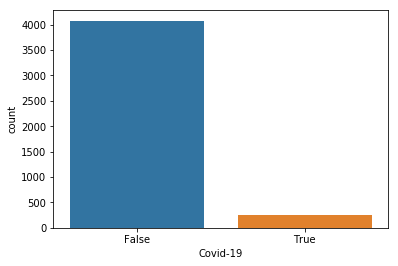

In [25]:
import seaborn as sb
print(final['Covid-19'].value_counts())
sb.countplot(final['Covid-19'])

False    4318
True        1
Name: Fever, dtype: int64


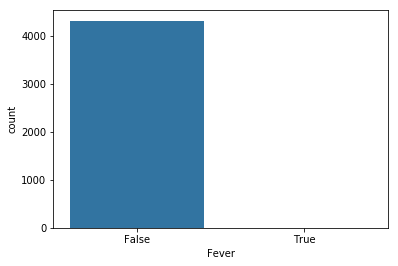

In [26]:
print(final['Fever'].value_counts())
sb.countplot(final['Fever'])

False    4272
True       47
Name: Pneumonia, dtype: int64


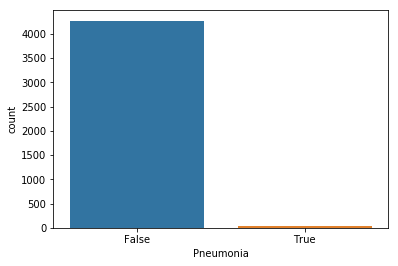

In [27]:
print(final['Pneumonia'].value_counts())
sb.countplot(final['Pneumonia'])

False    4318
True        1
Name: Cough, dtype: int64


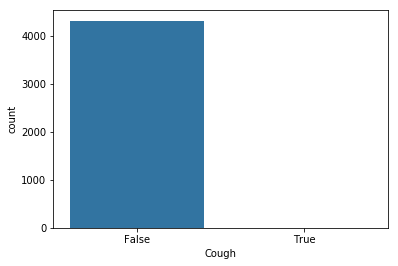

In [28]:
print(final['Cough'].value_counts())
sb.countplot(final['Cough'])

False    4319
Name: Respiratory problem, dtype: int64


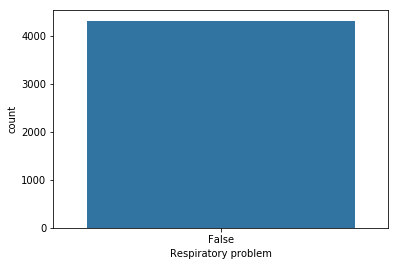

In [30]:
print(final['Respiratory problem'].value_counts())
sb.countplot(final['Respiratory problem'])